Go through this section once, you have gone through `build_makemore.ipynb`

In [217]:
import torch
import pickle

In [218]:
# Lets load the cleaned names dataset prepared in build_makemore.ipynb

with open('indian_names_clean.pkl', 'rb') as f:
    names = pickle.load(f)

print(f"Ready! Loaded {len(names)} names")
print("First 10:", names[:10])

Ready! Loaded 64128 names
First 10: ['jyotirmoy', 'ilamuhil', 'indravathi', 'raamen', 'benudhar', 'mithushaya', 'malani', 'sathuna', 'oviyashri', 'vaitheeswarsn']


In [219]:
# Creating the lookup for our characters

chars = sorted(list(set(''.join(names))))
stoi = { s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

print(stoi)

{'-': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '.': 0}


In [220]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: '-', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 0: '.'}


In [221]:
# Our dataset will look like (x, y), where x is the first character and y would be the following character given x
# x is the input and the model should predict y
# Creating the training set for bigrams

xs, ys = [], []

for name in names[:1]:
    print(name)
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(f'{ch1}{ch2}')
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

jyotirmoy
.j
jy
yo
ot
ti
ir
rm
mo
oy
y.


In [222]:
xs

tensor([ 0, 11, 26, 16, 21, 10, 19, 14, 16, 26])

In [223]:
ys

tensor([11, 26, 16, 21, 10, 19, 14, 16, 26,  0])

Looking at the above results:
xs = [ 0, 11, 26, 16, 21, 10, 19, 14, 16, 26]
ys = [11, 26, 16, 21, 10, 19, 14, 16, 26,  0]

This means that we should have a neural network (the parameters of the neural network) in such a way that it should output:
1. a high probability of 11, when the input is 0
2. a high probability of 26, when the input is 11
3. a high probability of 16, when the input is 26
4. a high probability of 21, when the input is 16
5. a high probability of 10, when the input is 21
6. a high probability of 19, when the input is 10
7. a high probability of 14, when the input is 19
8. a high probability of 16, when the input is 14
9. a high probability of 26, when the input is 16
10. a high probability of 0, when the input is 26

So there are 10 distinct examples of inputs to the neural net and correspondingly 10 distict outputs


### One Hot Encoding
When we think of providing inputs to the neural network, we should not provide the input at stoi(ch) as even though stoi returns the index, it is a integer value, and they will have a relation among themselves which we do not want to propagate. 
For example: stoi['j'] = 11 and stoi['i'] = 10

But when we are using these indices directly as inputs to neural network, the neural network performs matrix multiplication operations: but 11*10  = 110 which is of no meaning in our dataset.
Also using the interger indices will inject the properties of integers as well to the neural network which might be irrelevant w.r.t characters.

To remove these kind of confusions, we use one hot encoding
11: 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
10: 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

torch has a function to convert integers (long) into one hot encoding. It also takes an input `num_classes`, which is number of classes, which in our case is 28

In [224]:
import torch.nn.functional as F

x_encoded = F.one_hot(xs, num_classes=28)
x_encoded

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [225]:
x_encoded.shape

torch.Size([10, 28])

One name input ('jyotirmoy') has 10 examples and each example has 28 dimensions.

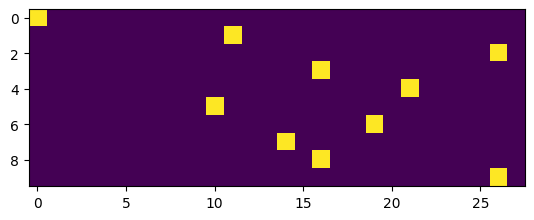

In [226]:
import matplotlib.pyplot as plt
plt.imshow(x_encoded)

One name data in our dataset had 10 examples, therefore, the input to the neural network has 10 rows, depicting 10 examples.\
We have encoded, the 10 examples into vectors: We have 10 rows corresponding to 10 examples and each row is a vector of 28 dimensions. \
The examples are formed by turning only the corresponding bit on as a 1 and all other bits in that example are 0s

One more thing which we should be careful of is: the data type of the input to the neural network should not be integer, they should be of type floating point numbers which can take on various values.

In [227]:
x_encoded.dtype

torch.int64

But the data type of x_encoded above is of type 64 bit int. \
The reason for this could be, the data type of xs is int64 and when we created the one hot encoding of xs, it took the data type of xs. \
So, we need to take care of that as well.

In [228]:
x_encoded = F.one_hot(xs, num_classes=28).float()

In [229]:
x_encoded.dtype

torch.float32

### First Neuron
Now let's construct our first neuron.

This neuron will look at the input vectors (rows) and will perform the operation `W*X + b`  - dot product

We can construct the vector W by using the `Normal Distribution`, where the most of the data points are close of 0 and some of the data points can be 3 or -3 

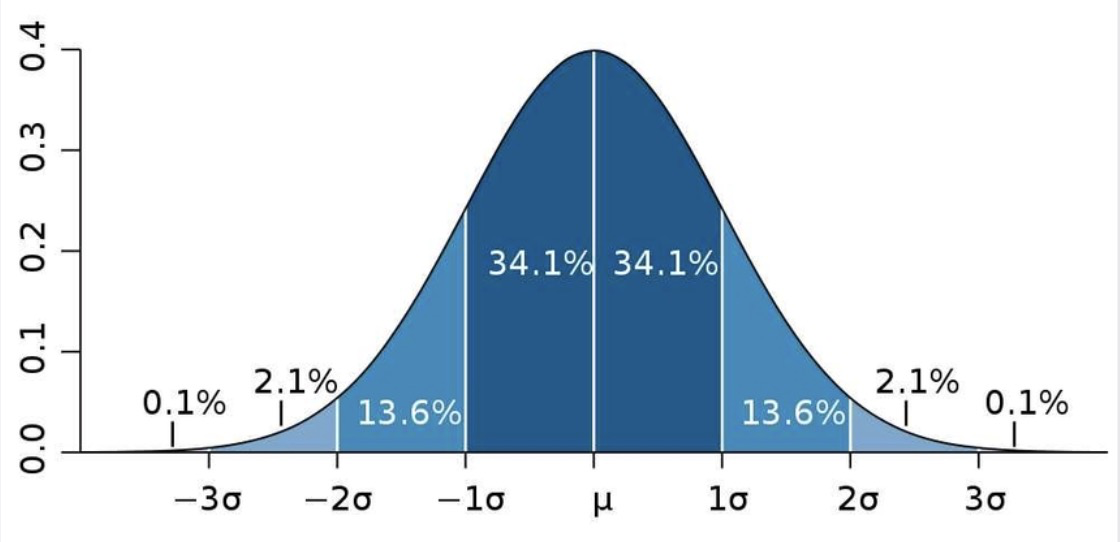

In [230]:
# Let's initialize the weights for this first neuron

W = torch.randn((28, 1))
x_encoded @ W           # @ is the matrix multiplication operator in pytorch

tensor([[-1.0208],
        [-0.4308],
        [-1.1092],
        [ 2.1242],
        [-0.5054],
        [ 1.7638],
        [ 1.2709],
        [ 0.3731],
        [ 2.1242],
        [-1.1092]])

x_encoded is matrix of size : [10 x 28] \
W is a matrix of size : [28 x 1] \
x_encoded . W will have the size : [10 x 1]

The result above shows the 10 activations of the neuron based on the 10 rows of input.\
Remember, that we fed all 10 inputs to the neuron simultaneously and not 1 by 1.

This was the case when we have only 1 neuron.

But we want 28 neurons to work with.

In [231]:
W = torch.randn((28, 28))

When we create a W matrix with size [28 x 28] \
Each column is a neuron \
Each row is the weight of the neuron which would be interacting with the input.

Column 0 of W is the 1st neuron, Column 1 is the second neuron and so on till Column 27 is the 28th neuron

When we write W[0, 1] -> the first weight of the second neuron\
W[12, 15] -> the 13th weight of the 16th neuron

We have 28 rows in W because the input example has one hot encoding comprising of 28 bits for each character in a name.

**We can understand it in this way:** \
Consider the name 'jyotirmoy' \
xs will have 10 entries for each character 9 (comprising 'jyotirmoy') and the starting character '.'
and for each 10 entries of above character, the ys will have 10 entries corresponding to the following characters and the ending character '.'

Every entry (out of the 10 entries) in xs, we will have 28 bit sized one hot encoding : so we will have 10 different one hot encodings to represent the name 'jyotirmoy'.

When we are considering this one name: we have 10 examples, and each example will have 10 corresponding output (y).

We are using 28 neurons, each with 28 weights which will be interacting with the 28 bits of the one hot encoding of the each example.

When we are given 'jyotirmoy': -> our xs becomes : `xs = [ 0, 11, 26, 16, 21, 10, 19, 14, 16, 26]

Which in one hot encoding looks like 
$$
\boxed{
\begin{bmatrix}
\to & . & - & a & b & c & d & e & f & g & h & i & j & k & l & m & n & o & p & q & r & s & t & u & v & w & x & y & z \\
\\
.   & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
j   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
y   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 \\
o   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
t   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 \\
i   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
r   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
m   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
o   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
y   & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \color{red}{\mathbf{1}} & 0 \\
\end{bmatrix}_{10 \times 28}
}
$$

This will be passed through the 28 neurons represented as below
$$
W = \begin{bmatrix}
W_{1,1} & W_{1,2} & W_{1,3} & \cdots & W_{1,28} \\
W_{2,1} & W_{2,2} & W_{2,3} & \cdots & W_{2,28} \\
W_{3,1} & W_{3,2} & W_{3,3} & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
W_{28,1} & W_{28,2} & \cdots & \cdots & W_{28,28}
\end{bmatrix}_{28 \times 28}
$$

When we do the operation : `X dot_product W` - we will pass each one hot encoding through each 28 neurons of W

In [232]:
(x_encoded @ W).shape

torch.Size([10, 28])

The above shows that we have the output in the form of a matrix of size [10 x 28], which means, we have 10 different y's corresponding to the 10 different xs's and each y's is represented in a 28 bit one hot encoding

In [233]:
# Consider the element (x_encoded @ W)[3,13]
(x_encoded @ W)[3,13]

tensor(0.2335)

`(x_encoded @ W)[3,13]` is telling us the firing rate of the 4th character of xs when passed through the 14th neuron, as confirmed by below result

In [234]:
(x_encoded[3] * W[:,13]).sum()

tensor(0.2335)

We created the first layer of our neural network where we have 28 neurons in the first layer and each neuron in the first layer has 28 inputs.\
These neurons 
* perform `W * X`
* they dont have bias
* they dont have any non linearity like `tanh`

And we are going to keep it this way : only one layer and with linear transformations.

The goal of all these 28 neurons would be to produce the probability distribution of the occurance of the next character in the sequence, given the input character.

At the moment, we are creating the parameters (W matrix) using the normal probability distribution, thats why we are getting some random numbers which have no correlation to the actual data that we have.\
However, we need to come up with a semantics to interpret the numbers coming our of the normal distribution which are getting assigned to the weights of our neurons.

We would like to create the W matrix in such a way that the parameters should have the probabilities of the occurance of next character as per our data set. Something exactly similar to our P tensor in `build_makemore.ipynb`

We want something similar to come out of our neural net as well:
* Each weight should be the probability of the character following the input character

but what we have right now is just some -ve and +ve numbers coming out of our neural network.

The probability matrix of `build_makemore.ipynb`, had the counts of each occurance of the bigram in our dataset which we later normalised to get the probabilities of the occurance of the bigram. \
Those probabilities had the basic form and structure:
* they were all +ve numbers 
* they sum to 1

And the above structure cannot come out of neurons, because, the output of our neurons:
* they cannot be counts becuase counts are all +ves (our weights have -ve values) and counts are integers -> so we cannot interpret the output from our neural net as counts

Instead of the counts, what we can interpret as the output of our 28 neurons are log of counts.\
And to get the log of counts, we will take the output of our neurons and we will exponentiate them. Because the `range` of exponentiation is `(0, infinity)` which is always +ve, even though its domain is the entire real numbers:\
which means, exp(x) will take both +ve and -ve inputs and will always output +ve values

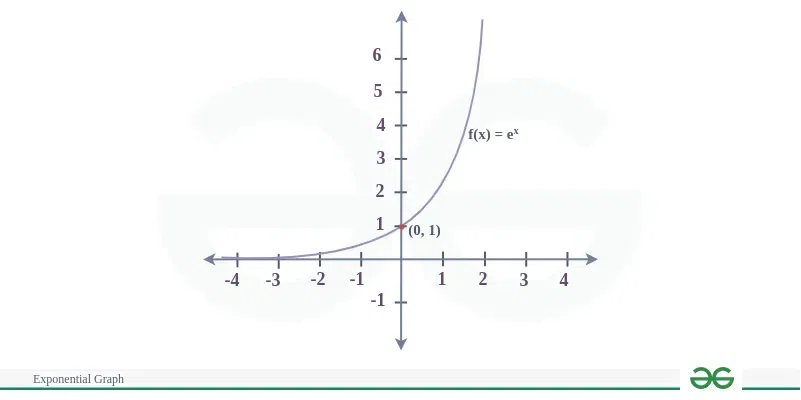

In [235]:
(x_encoded @ W).exp()

tensor([[ 1.4123,  0.7388,  4.6729,  0.4670,  1.2190,  0.1297,  0.1664,  0.1724,
          2.4207,  0.4253,  2.3573,  1.7438,  0.1086,  0.3809,  1.7746,  3.5639,
          0.9486,  1.9477,  0.2393,  1.5640,  2.5747, 12.4109,  0.7056,  0.8134,
          0.9862,  0.2361,  1.7550,  0.9420],
        [ 0.2286,  0.6005,  0.4186,  0.7083,  1.7124,  2.9676,  0.4873,  0.1762,
          0.1803,  0.7749,  1.3030,  3.2246,  0.0602,  1.2025,  0.4410,  1.6446,
          0.3024,  0.8381,  1.3556,  1.8172,  2.5256,  1.2067,  2.4448,  0.8912,
          0.6705,  1.5228,  3.8774,  0.1608],
        [ 0.1176,  0.7519,  0.8224,  4.6950,  0.2305,  1.0969,  2.1957,  0.2230,
          0.6360,  4.4249,  0.7777,  1.0277,  0.3371,  5.1600,  0.6843,  1.5811,
          2.5331,  1.9227,  0.7525,  1.7617,  1.8289,  0.8954,  0.3156,  0.9961,
          1.1316,  1.7359,  0.2769,  1.1805],
        [ 1.3652,  1.2832,  0.2752,  1.3332,  1.3247,  0.3844,  1.6288,  0.6260,
          2.3918,  0.6085,  1.9125,  0.9255,  0.1585

### Softmax

Notice, in the above cell result, all the negative values turned into +ve floating point numbers `< 1` and all the +ve numbers turned into values `> 1`

Hence, we can interpret these values obtained by exponentiating the result of the output from our neurons, as counts of the occurances of the bigrams as they are always positive numbers.\
Remember that these are all $fake counts$

Depending on the setting of the various weights within W, the above results can be tuned.

In [236]:
logits = x_encoded @ W          # logits = log counts
counts = logits.exp()           # equivalent to the N matrix in build_makemore.ipynb

# probabilities will now be normalized counts
probs = counts / counts.sum(dim=1, keepdim=True)

* counts matrix is a [10 x 28] matrix
* dimension indices are 10 has index 0 and 28 has index 1
* we want to have the counts of each row - count all the values of the columns of that row and store in that row:\
we want to count all the column values ; hence dim=1

The process of getting the probabilities of the next character by normalizing the counts is a **softmax**

```
Softmax = 
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
```

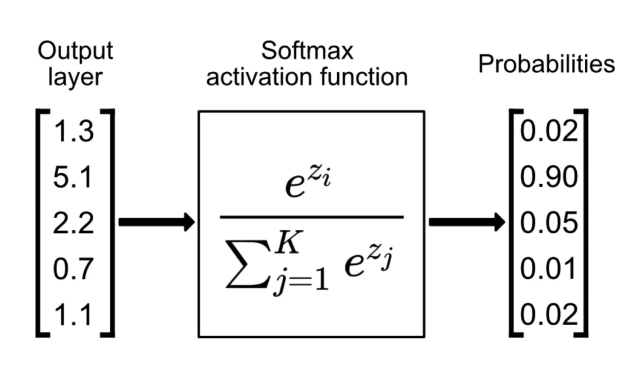

**Softmax** is a very often used layer in a neural network, which takes the `z` as shown in the diagram above (they are our `logits`), exponentiates them and then divides and normalizes them.

Its a way of taking outputs of a neural net layer (which could be +ve or -ve) and it outputs the probability distributions: which always \
* sum to 1 (sum of the output from a softmax is always 1) and 
* they are always +ve numbers

Its kind of a Normalization Function, if you can think of it that way and we can put it on top of any other linear layer inside a neural net. It will make the neural net output probabilities.

In [237]:
probs

tensor([[0.0301, 0.0158, 0.0997, 0.0100, 0.0260, 0.0028, 0.0035, 0.0037, 0.0516,
         0.0091, 0.0503, 0.0372, 0.0023, 0.0081, 0.0379, 0.0760, 0.0202, 0.0415,
         0.0051, 0.0334, 0.0549, 0.2648, 0.0151, 0.0174, 0.0210, 0.0050, 0.0374,
         0.0201],
        [0.0068, 0.0178, 0.0124, 0.0210, 0.0507, 0.0879, 0.0144, 0.0052, 0.0053,
         0.0230, 0.0386, 0.0956, 0.0018, 0.0356, 0.0131, 0.0487, 0.0090, 0.0248,
         0.0402, 0.0539, 0.0748, 0.0358, 0.0725, 0.0264, 0.0199, 0.0451, 0.1149,
         0.0048],
        [0.0029, 0.0188, 0.0205, 0.1171, 0.0057, 0.0274, 0.0548, 0.0056, 0.0159,
         0.1104, 0.0194, 0.0256, 0.0084, 0.1287, 0.0171, 0.0394, 0.0632, 0.0480,
         0.0188, 0.0439, 0.0456, 0.0223, 0.0079, 0.0248, 0.0282, 0.0433, 0.0069,
         0.0294],
        [0.0297, 0.0279, 0.0060, 0.0290, 0.0288, 0.0084, 0.0354, 0.0136, 0.0520,
         0.0132, 0.0416, 0.0201, 0.0034, 0.0275, 0.0055, 0.0348, 0.0242, 0.0919,
         0.0798, 0.0382, 0.0067, 0.0237, 0.1357, 0.0468

In [238]:
probs[0].sum()

tensor(1.)

So, both the conditions are now matching:
* all the outputs coming out of our neurons should be +ve
* the sum of all the outputs across the rows should be 1

Hence, we can interpret these outputs as the probabilities of the occurances of the bigrams : similar to `build_makemore.ipynb`

And all the operations that we are performing (multiplying as dot product, exponentiation) are differentiable.

In [239]:
probs[0]

tensor([0.0301, 0.0158, 0.0997, 0.0100, 0.0260, 0.0028, 0.0035, 0.0037, 0.0516,
        0.0091, 0.0503, 0.0372, 0.0023, 0.0081, 0.0379, 0.0760, 0.0202, 0.0415,
        0.0051, 0.0334, 0.0549, 0.2648, 0.0151, 0.0174, 0.0210, 0.0050, 0.0374,
        0.0201])

`probs[0]` above tells the below information:
1. 0 means, it is the first character of the name 'jyotirmoy' -> '.' -> the starting character
2. then we one hot encoded it as `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`
3. then we fed the above one hot encoding to our 28 neurons
4. each neuron above gave the probabilities of the occurances of all the other characters in our dataset \
as : `[0.0167, 0.0269, 0.0177, 0.0643, 0.0134, 0.0114, 0.0110, 0.0120, 0.0045, 0.0041, 0.0042, 0.0056, 0.0025, 0.0258, 0.0037, 0.0179, 0.0026, 0.3953, 0.0023, 0.0040, 0.0136, 0.0101, 0.0083, 0.0360, 0.0347, 0.1885, 0.0066, 0.0563]`
5. from the result, we see that 17th character has the highest probability (0.3953) of occuring, which is 'p' as seen below

In [240]:
itos[17]

'p'

We will tune the weights, we will get the different values of the probabilities of the occurance of the next character for any character that we input.

Question 1. Can we optimize the probabilities by tuning W, so that the output coming out are **good**?

And the way we measure **good** is by having a **Loss Function**.

In [241]:
# SUMMARY ------------------------->>>>>
xs              # we have an input

tensor([ 0, 11, 26, 16, 21, 10, 19, 14, 16, 26])

In [242]:
ys              # we have the corresponding output

tensor([11, 26, 16, 21, 10, 19, 14, 16, 26,  0])

In [243]:
# randomly initialize 28 neurons (their weights), each neuron receives 28 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((28, 28), generator=g)

In [244]:
# FORWARD PASS ------------------->>>>>>>
x_encoded = F.one_hot(xs, num_classes=28).float()       # input to the network -> one-hot encoding
logits = (x_encoded @ W)                                # predict log counts
counts = logits.exp()                                   # counts , equivalent to N in build_makemore.ipynb
probs = counts / counts.sum(dim=1, keepdim=True)        # probabilities for next character 

All the operations in the **forward pass** are differentiable - would help in our back propagation
1. $ logits = (x\_encoded\ @\ W) $ is a basic operation of multiplication followed by addition which are differentiable and we know how to backpropagate through them
2. $ counts = logits.exp() $ is differentiable and we know how to backpropagate through it
3. $ counts.sum(dim=1, keepdim=True) $ is simple summing and it can be differentiated and backpropagated
4. and $ counts / counts.sum(dim=1, keepdim=True) $ is division which can be differentiated and backpropagated

In [245]:
probs.shape

torch.Size([10, 28])

We have 10 examples\
and for every single example, we have 28 bits of one-hot encoding

### Loss Function
* **Log probabilities**
* **Log likelihood**
* **Negative Log Likelihood**



In [246]:
nlls = torch.zeros(10)

for i in range(10):                 # for all the examples in our input: 10 examples making up : 'jyotirmoy'

    # i-th bigram
    x = xs[i].item()        # index of the input character
    y = ys[i].item()        # index of the label character

    print(15*'-')
    print(f'Bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print(f'Input to the neural network: {x}')
    print(f'Output probabilities from the neural network: {probs[i]}')
    print(f'Label (actual next character): {y}')

    p = probs[i, y]                           # probability of character at index y given the previous character is that of the i-th bigram as assigned by our neural network

    print('Probability assigned by the neural network to the correct character: ', p.item())

    logp = torch.log(p)                       # log likelihood
    print('Log Likelihood : ', logp.item())

    nll = -logp
    print('Negative Log likelihood: ', nll.item())

    nlls[i] = nll

print(15*'=')
print(nlls)
print('Average Negative Log Likelihood, i.e. loss = ', nlls.mean().item())



---------------
Bigram example 1: .j (indexes 0, 11)
Input to the neural network: 0
Output probabilities from the neural network: tensor([0.0603, 0.0099, 0.0122, 0.0042, 0.0167, 0.0122, 0.0027, 0.0230, 0.0136,
        0.0311, 0.0078, 0.0276, 0.0091, 0.0082, 0.0496, 0.2363, 0.0599, 0.0025,
        0.0248, 0.0054, 0.0337, 0.0108, 0.0029, 0.0197, 0.0117, 0.1527, 0.1450,
        0.0064])
Label (actual next character): 11
Probability assigned by the neural network to the correct character:  0.027618665248155594
Log Likelihood :  -3.589263439178467
Negative Log likelihood:  3.589263439178467
---------------
Bigram example 2: jy (indexes 11, 26)
Input to the neural network: 11
Output probabilities from the neural network: tensor([0.0611, 0.1223, 0.0200, 0.0142, 0.0493, 0.0336, 0.0197, 0.0359, 0.0379,
        0.0625, 0.0162, 0.0607, 0.0337, 0.0398, 0.0025, 0.0178, 0.0166, 0.0268,
        0.0691, 0.0105, 0.0431, 0.0360, 0.0185, 0.0511, 0.0591, 0.0209, 0.0080,
        0.0131])
Label (actual next

We are analysing the results of just one name from the entire data set which has 10 examples of bigrams in it.\
Looking at the first iteration result:

```
---------------
Bigram example 1: .j (indexes 0, 11)
Input to the neural network: 0
Output probabilities from the neural network: tensor([0.0603, 0.0099, 0.0122, 0.0042, 0.0167, 0.0122, 0.0027, 0.0230, 0.0136,
        0.0311, 0.0078, 0.0276, 0.0091, 0.0082, 0.0496, 0.2363, 0.0599, 0.0025,
        0.0248, 0.0054, 0.0337, 0.0108, 0.0029, 0.0197, 0.0117, 0.1527, 0.1450,
        0.0064])
Label (actual next character): 11
Probability assigned by the neural network to the correct character:  0.027618665248155594
Log Likelihood :  -3.589263439178467
Negative Log likelihood:  3.589263439178467
---------------
```

The line : `Probability assigned by the neural network to the correct character:  0.027618665248155594`\
tells us that our model gave only a 2% chance for a name to start with 'j'\
and that is why its negative log likelihood value is very high.

Similarly, we can analyse other examples.

The total loss of the neural net from one name input will be the average of all the examples from all the names in our dataset.

From only one name : the neural net gave the loss of `~4` which is very high

The loss that we calculated, if made up of all differentiable operations.\
We can minimize the loss, by tuning the W's by computing the gradients of the loss w.r.t the W matrix.

When we minimize the loss, we can find a good setting of W, using **gradient based optimization**

### Optimization of the Neural Network

In [247]:
xs

tensor([ 0, 11, 26, 16, 21, 10, 19, 14, 16, 26])

In [248]:
ys

tensor([11, 26, 16, 21, 10, 19, 14, 16, 26,  0])

In [249]:
# randomly initialize 28 neurons (their weights), each neuron receives 28 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((28, 28), generator=g)

In [250]:
# FORWARD PASS ------------------->>>>>>>
x_encoded = F.one_hot(xs, num_classes=28).float()       # input to the network -> one-hot encoding
logits = x_encoded @ W                                # predict log counts
counts = logits.exp()                                   # counts , equivalent to N in build_makemore.ipynb
probs = counts / counts.sum(dim=1, keepdim=True)        # probabilities for next character 

In [251]:
# Loss
num_of_chars = len(xs)                    # num_of_chars = total number of characters encountered in our datasets (will have duplicates)

print(num_of_chars)

nlls = torch.zeros(num_of_chars)

for index in range(num_of_chars):              # For all the characters in our dataset
    x = xs[index].item()           # lookup index of input character
    y = ys[index].item()           # lookup index of actual following character after x

    y_hat = probs[index, y]           # predicted probabilities 

    logp = torch.log(y_hat)            # log likelihood
    nll = -logp
    nlls[index] = nll

print(nlls)

avg_nll = nlls.mean().item()
print(avg_nll)

10
tensor([3.5893, 4.8341, 2.8727, 3.7758, 4.0921, 5.2503, 5.0075, 3.0890, 2.4636,
        4.8356])
3.9810080528259277


### Better Pytorchy Way
A better way to calculate the loss is :

The tensor `probs` stores the probabilities of characters that are followed by the character at index of the row as assigned by our neural network.\
That means, `probs[x, y]` gives the probability of the bigram `x,y` as assigned by our neural network\
Here, `x and y in probs[x, y]` will go from `0 to 28 (total number of characters in our data set)`


For example: \
`probs[2, 10]` will give the probability of the bigram `ai`

In [252]:
probs.shape

torch.Size([10, 28])

In [253]:
# To get the entire probabilities tensor that has been formed 
probs[torch.arange(num_of_chars), ys]


tensor([0.0276, 0.0080, 0.0565, 0.0229, 0.0167, 0.0052, 0.0067, 0.0455, 0.0851,
        0.0079])

In [254]:
# Loss
torch.log(probs[torch.arange(num_of_chars), ys]).mean()

tensor(-3.9810)

### Gist till now

Below cell has the complete work done till now in one cell for better recollection

In [277]:

stoi = {s:i+1 for i, s in enumerate(sorted(list(set(''.join(names)))))}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

xs, ys = [], []

for name in names[:1]:
    chs = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

num_of_chars = len(xs)

xs = torch.tensor(xs) 
ys = torch.tensor(ys)

# Define Neural Network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((28, 28), generator=g, requires_grad=True)          # This is very important: requires_grad has to be set

x_encoded = F.one_hot(xs, num_classes=28).float()

# Forward pass -------------------->>>>>>>>>>>>>>>>
logits = (x_encoded @ W)
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

# probs is the complete set of probabilities created by our neural network for all possible bigrams
# whereas, for loss calculations, we are interested only in the probabilities of the test case bigrams : y_hat in the previous cell

probs_input = probs[torch.arange(num_of_chars), ys]  # probability assigned by our neural network to our inputs
log_likelihood = probs_input.log()
nll = -log_likelihood

# Loss = Average Negative Log Likelihood
avg_nll = nll.mean().item()

loss = nll.mean()
print("Loss = ",avg_nll)

Loss =  3.9810080528259277


### Backward Pass

In [278]:
# Backward pass -------------------->>>>>>>>>>>>>>>>

# 1. Set all the gradients to 0 -> in pytorch, we assign them as 'none' which tells it that it has not been assigned yet
W.grad = None
loss.backward()

In [279]:
W.grad.shape

torch.Size([28, 28])

In [280]:
W.grad[0, 0]

tensor(0.0060)

### Gradient Information

The value of `W.grad[row, col]` tells us about how that specific value will affect the loss.

+ve value of `W.grad[i,j]` => if we slightly change the value of `W[i,j].data` by adding a small increment - will make the loss greater 
-ve value of `W.grad[i,j]` => if we slightly change the value of `W[i,j].data` by adding a small increment - will make the loss smaller

=> if `h` is a very small value , lets assume `0.001`
`W[i,j].data + h` will make the loss greater if `W.grad[i,j]` is +ve and \
`W[i,j].data + h` will make the loss smaller if `W.grad[i,j]` is -ve

From the above, we can say that we need to move in the opposite direction of W.grad in order to make the loss smaller

From the above, we have to subtract a positive value from `W.grad[i,j]` so as to make the loss come towards 0\
* If `W.grad[i,j]` is +ve, then we need to subtract a value from `W[i,j].data` to make the loss smaller
* If `W.grad[i,j]` is -ve, then we need to add a value from `W[i,j].data` to make the loss smaller

### Updating the parameters
Updating the parameters as per the gradient

In [283]:
W.data += -0.1 * W.grad

In [285]:
# Since, we have updated the neural network according to gradient descend, the loss should have decreased
loss.item()

3.9810080528259277

Loss before NN updation: Loss =  3.9810080528259277

In [286]:
# Forward pass -------------------->>>>>>>>>>>>>>>>
logits = (x_encoded @ W)
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

# probs is the complete set of probabilities created by our neural network for all possible bigrams
# whereas, for loss calculations, we are interested only in the probabilities of the test case bigrams : y_hat in the previous cell

probs_input = probs[torch.arange(num_of_chars), ys]  # probability assigned by our neural network to our inputs
log_likelihood = probs_input.log()
nll = -log_likelihood

# Loss = Average Negative Log Likelihood
avg_nll = nll.mean().item()

loss = nll.mean()
print("Loss = ",avg_nll)

Loss =  3.96081805229187


Loss before NN updation: Loss =  3.9810080528259277
Loss after NN updation : Loss =  3.96081805229187

### Every thing at one go

In [309]:
# Create the dataset ------------>>>>>>>>>
xs, ys = [], []

stoi = {s:i+1 for i, s in enumerate(sorted(list(set(''.join(names)))))}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(100*'-')
num_of_chars = xs.numel()
print(f'Input dataset: {xs.tolist()}\nOutput dataset: {ys.tolist()}')
print('Total number of elements in dataset: ', num_of_chars)
print(100*'-')

# Initialize the neural network ------------>>>>>>>>>
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((28, 28), generator=g, requires_grad=True)

# Gradient Descent ------------>>>>>>>>>
x_encoded = F.one_hot(xs, num_classes=28).float()
for loop in range(10):
    print(50*'=')
    print(f"Iteration # {loop}")
    # Forward Pass  ------------>>>>>>>>>
    logits = x_encoded @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)        # softmax

    probs_input = probs[torch.arange(num_of_chars), ys]
    log_likelihood = probs_input.log()
    nll = -log_likelihood

    loss = nll.mean()
    print(f"Loss : {loss.item()}")

    # Backward Pass  ------------>>>>>>>>>
    W.grad = None
    loss.backward()

    # Weights updation ---------->>>>>>>>>
    W.data += -50 * W.grad


----------------------------------------------------------------------------------------------------
Input dataset: [0, 11, 26, 16, 21, 10, 19, 14, 16, 26, 0, 10, 13, 2, 14, 22, 9, 10, 13, 0, 10, 15, 5, 19, 2, 23, 2, 21, 9, 10, 0, 19, 2, 2, 14, 6, 15, 0, 3, 6, 15, 22, 5, 9, 2, 19, 0, 14, 10, 21, 9, 22, 20, 9, 2, 26, 2, 0, 14, 2, 13, 2, 15, 10, 0, 20, 2, 21, 9, 22, 15, 2, 0, 16, 23, 10, 26, 2, 20, 9, 19, 10, 0, 23, 2, 10, 21, 9, 6, 6, 20, 24, 2, 19, 20, 15, 0, 23, 10, 4, 9, 22, 0, 20, 2, 14, 10, 19, 2, 0, 3, 19, 2, 9, 14, 2, 15, 2, 15, 5, 2, 14, 0, 2, 2, 14, 19, 2, 17, 2, 2, 13, 10, 0, 12, 16, 23, 2, 19, 21, 9, 2, 15, 6, 15, 0, 15, 2, 15, 5, 10, 17, 6, 21, 2, 0, 11, 2, 26, 2, 20, 2, 15, 12, 2, 19, 0, 19, 2, 3, 10, 15, 5, 19, 2, 0, 20, 2, 11, 10, 21, 23, 2, 15, 0, 23, 2, 20, 9, 10, 20, 9, 21, 0, 11, 6, 26, 2, 20, 22, 21, 9, 2, 0, 26, 22, 2, 15, 0, 14, 2, 15, 15, 22, 13, 2, 13, 0, 2, 20, 14, 10, 21, 0, 5, 2, 19, 2, 17, 2, 15, 6, 15, 10, 0, 19, 2, 11, 6, 20, 9, 12, 2, 15, 15, 2, 15, 0, 2, 

We have seen and achieved a comparitively better model with our neural network.

### Comparing against - Counting based probability of bigram - previous model
The neural net based Bigram Character language model is more flexible as compared to the model where we calculated the probabilities using counting the occurances of bigrams in our dataset